In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import interpolate
import pylab as pyl

%matplotlib inline

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Global minima: [-0.08984202  0.7126564 ]
The value of the function for that point is: -1.0316284534898768


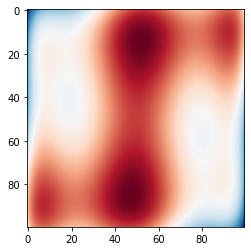

In [2]:
def fun(var):
    x, y = var
    return ((4 - 2.1*(x**2) + ((x**4)/3))* (x**2) + x * y + (4 * (y**2) - 4) * (y**2))



x0 = [-2, 1]
glb_min = optimize.minimize(fun, x0)
if glb_min.success:
    fitted_params = glb_min.x
    value = glb_min.fun
    print("Global minima: " + str(fitted_params))
    print("The value of the function for that point is: " + str(value))
else:
    raise ValueError(glb_min.message)

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)

XY = np.meshgrid(x, y) # grid of point
Z = fun(XY) # evaluation of the function on the grid

im = pyl.imshow(Z,cmap=pyl.cm.RdBu) # drawing the function

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

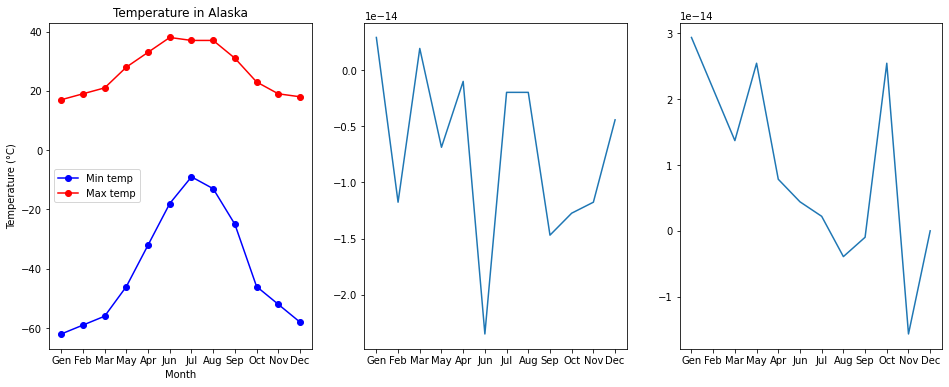

In [47]:
def f(x):
    measures = np.sin(2 * np.pi * x) 
    return measures

x_lb = ['Gen','Feb','Mar','May','Apr','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
max_temp = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_temp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize = (16,6)) 

ax0.plot(x_lb,min_temp, c="b" , label ="Min temp", marker = 'o')
ax0.plot(x_lb,max_temp, c="r", label ="Max temp", marker = 'o' )
ax0.set_xlabel('Month')
ax0.set_ylabel('Temperature (°C)')
ax0.set_title('Temperature in Alaska')
ax0.legend()

linear_interp = interpolate.interp1d(np.linspace(0,1,12), f(max_temp))


linear_results = linear_interp(np.linspace(0,1,12))
ax1.plot(x_lb, linear_results)
ax2.plot(x_lb, f(min_temp))

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [12]:
datafile = "data/residuals_261.pkl"

df_res = pd.read_pickle(datafile)

df_res = pd.DataFrame(df_res.flat[0])



,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.